# Tool to visualize inference results


## Input
out.csv: Inference results obtained from main.py 
## Output
Plot of the images with title as image path + image name + gender inference

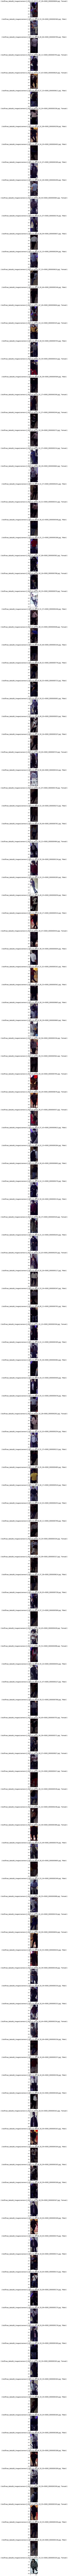

In [16]:
import matplotlib.pyplot as plt
import argparse
import logging
from PIL import Image 
import pandas as pd
import os
import csv
from math import ceil
from attributes import attributes_list 

# Level of warnings
logging.basicConfig(format='[%(levelname)s]: %(message)s', level=logging.INFO) 

def main(csv_path):

   
    ROOT_PATH = '/home/ubuntu/gender_repos/iccv19_attribute/'
    #Call function
    df_results = csv_path
    num_images = -1
    create_results_visualization(ROOT_PATH, df_results,num_images)

def create_results_visualization(ROOT_PATH,results_path,num_results):
    '''
    input: 
    inferences_file.csv -> csv file containing inference results in format: name,at1,..,atn
    num_results -> number of images to display

    output: 
    results.png -> png image with <num_results> images and their inferences
    '''

    DATA_DIR = os.environ.get('LOCAL_DATA_DIR')
    
    #DATA_DOWNLOAD_DIR = os.environ.get('DATA_DOWNLOAD_DIR')
    csv_path = results_path
    results = []
    gender_column = 17
    
    #Only for gender
    with open(csv_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        headings = next(csv_reader)
        #for i,head in enumerate(headings):
            #print(i,'->',head)
        for row in csv_reader:
            if row[gender_column] == '1':
                results.append((row[0], 'Male'))
            elif row[gender_column] =='0':
                results.append((row[0], 'Female'))

        #logging.info('Grid frame: {}'.format((results))) 

    #w,h = 20,20
    fig = plt.figure(figsize=(256,512))
    columns = 1
    rows = 145
    #numElems = 145

    for i in range(1,columns*rows):
        ax = fig.add_subplot(rows, columns,i)
        #print(i)
        img = Image.open(os.path.join(ROOT_PATH,results[i][0]))
        img = img.resize((128,256), Image.ANTIALIAS)
        #title = results[i][0]
        plt.imshow(img)
        ax.set_title(results[i][:], fontsize=15)
#csv_path = '/home/ubuntu/gender_repos/iccv19_attribute/Inference_result.csv'
csv_path = '/home/ubuntu/gender_repos/iccv19_attribute/out.csv'
main(csv_path) 
    